# Corner Detection

## Harris Corner

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Flat Chess Board

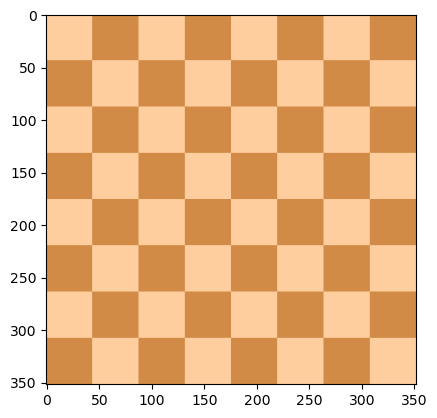

In [72]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

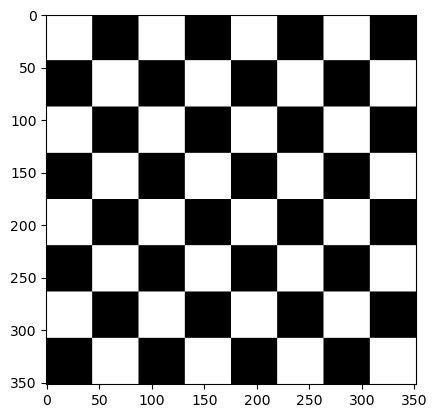

In [73]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

### Load Real Chess Board

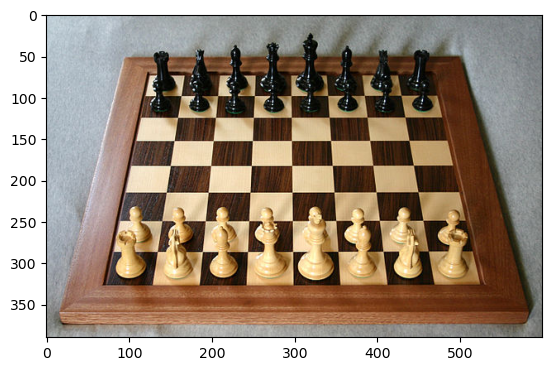

In [74]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

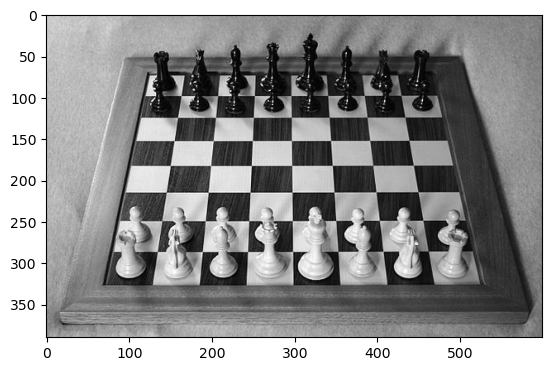

In [75]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

In [76]:
gray = np.float32(gray_flat_chess)
#gray

In [77]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
dst

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

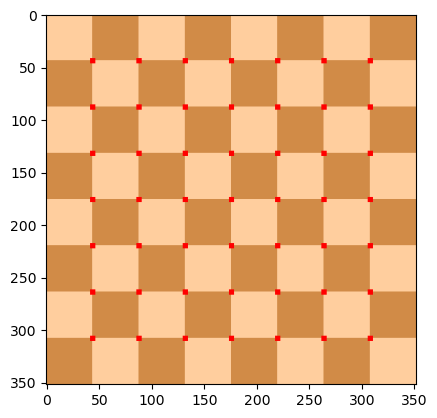

In [78]:
flat_chess[dst > 0.01 * dst.max()] = [255, 0, 0]
plt.imshow(flat_chess)

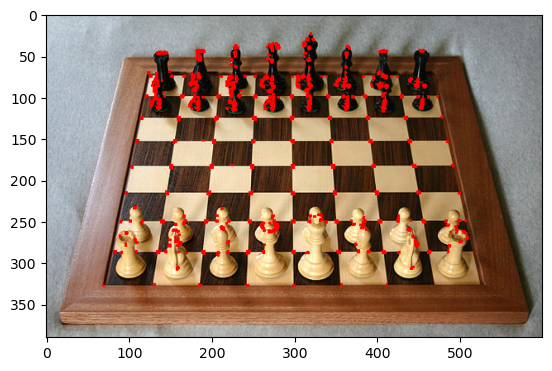

In [79]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst > 0.01 * dst.max()] = [255, 0, 0]
plt.imshow(real_chess)

## Shi Tomasi

In [80]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

Second parameter here is the number of corners to detect
0 means all

In [81]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 0, 0.01, 10)
corners = np.int0(corners)

/var/folders/b4/72khx5310nz1rgsn3_lr93q00000gn/T/ipykernel_9294/4126286574.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [82]:
for i in corners:
  x, y = i.ravel()
  cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

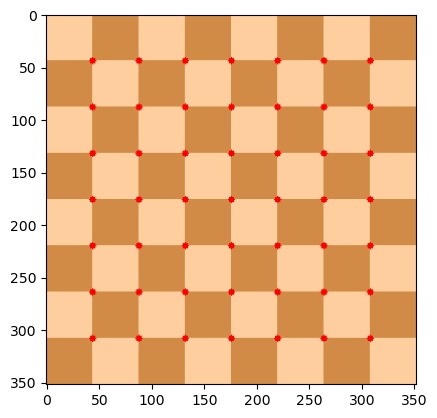

In [83]:
plt.imshow(flat_chess)

In [84]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01, 10)
corners = np.int0(corners)

/var/folders/b4/72khx5310nz1rgsn3_lr93q00000gn/T/ipykernel_9294/4179531429.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [85]:
for i in corners:
  x, y = i.ravel()
  cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
  

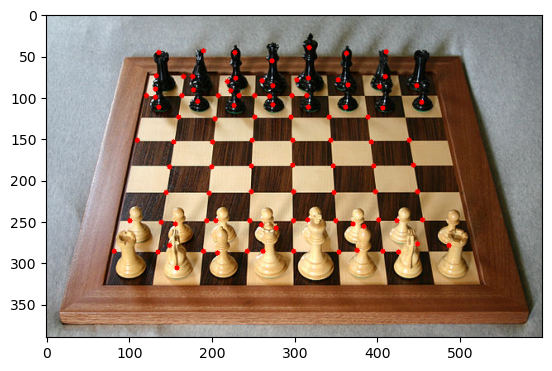

In [86]:
plt.imshow(real_chess)